# Data Challenge 2023 - 30
### BioViz

Ideas de análisis (Ignorar las ideas)
1. Examinar correlación entre variables que predigan la presencia/ausencia de una especie.
2. Contabilizar la proporción de reinos por dataset
3. Crear pruebas de hipótesis (pensar alguna)
4. Caracterizacion del terrirtorio geolocalizado donde esta el dataset para ver las especies qeue estám em riesgo de acuerdo a la condiciones ab ientales usando pruebas de hipotesis y probabilidad


datasets SE UNIRAN LOS DATASET 1 Y 2 PARA EL ANÁLISIS GENERAL

1. Monitoreos trianuales de fauna y flora en el Valle del Cerrejón, La Guajira mff1 - 80.359
2. Monitoreos trianuales de grupos hidrobiológicos en el Valle del Cerrejón, La Guajira mh2 - 30.994
3.  Caracterización de fauna terrestre y flora en el arroyo Bruno, municipio de Albania, La Guajira cff3 - 27.936
examinar las condiciones ambientales de l abiodiversidad del lugar
4. Monitoreos de los ecosistemas marinos de la bahía Portete, Puerto Bolívar, La Guajira mmb4 - 20634
5. Caracterización de grupos hidrobiológicos en el arroyo Bruno, municipio de Albania, La Guajira chb5 - 15.589
6. Capacidad de carga y compensación de fauna y flora en el Valle del Cerrejón, La Guajira ccff6 - 7653
7.  Monitoreos hidrobiológicos del Valle del Cerrejón en cuatro municipios del departamento de La Guajira mhv7 - 7423
8. Censo forestal asociado al nuevo cauce del arroyo Bruno, municipio de Albania, La Guajira cfb8 - 5586
9. Caracterización de fauna y flora de Puerto Bolívar, municipio de Uribia, La Guajira cffpb9 - 926

### Paquetes

In [2]:
!pip install statsmodels==0.14.0

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn as sklearn
# import networkx as nx
import scipy
import seaborn as sns
from scipy.stats import chi2_contingency
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Carga y análisis de datos
Se unen los primeros dos dataset mff1 y mh2

In [4]:
headers = ["gbifID", "datasetKey", "occurrenceID", "kingdom", "phylum", "class", "order", "family", "genus", "species", "infraspecificEpithet", "taxonRank", "scientificName", "verbatimScientificName", "verbatimScientificNameAuthorship", "countryCode", "locality", "stateProvince", "occurrenceStatus", "individualCount", "publishingOrgKey", "decimalLatitude", "decimalLongitude", "coordinateUncertaintyInMeters", "coordinatePrecision", "elevation", "elevationAccuracy", "depth", "depthAccuracy", "eventDate", "day", "month", "year", "taxonKey", "speciesKey", "basisOfRecord", "institutionCode", "collectionCode", "catalogNumber", "recordNumber", "identifiedBy", "dateIdentified", "license", "rightsHolder", "recordedBy", "typeStatus", "establishmentMeans", "lastInterpreted", "mediaType", "issue"]

In [5]:
mff1 = pd.read_csv('mff1.csv', names = headers,  sep='\t')
mh2 = pd.read_csv('mh2.csv', names = headers,  sep='\t')
#low_memory=False

<ipython-input-5-8578887e6516>:1: DtypeWarning: Columns (0,19,21,22,23,24,25,26,27,28,30,31,32,33,34,37,38,40,41,43,45,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  mff1 = pd.read_csv('mff1.csv', names = headers,  sep='\t')
<ipython-input-5-8578887e6516>:2: DtypeWarning: Columns (0,10,19,21,22,23,24,25,26,27,28,30,31,32,33,34,37,38,39,40,41,43,45,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  mh2 = pd.read_csv('mh2.csv', names = headers,  sep='\t')


Combinar los datasets en uno solo

In [6]:
datos = pd.merge(mff1, mh2, how='outer')
datos.head(5)

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
1,3897965659,5fdcdc28-2a80-4236-a257-866b42ed250c,CERREJON:Aves_A.Palomino_Aves_2006:6627,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Busarellus,Busarellus nigricollis,...,NaN,NaN,CC_BY_NC_4_0,NaN,Walberto Naranjo;Wilmer Nunez,NaN,NaN,2023-08-25T16:37:10.867Z,NaN,COORDINATE_ROUNDED
2,3897965658,5fdcdc28-2a80-4236-a257-866b42ed250c,CERREJON:Aves_A.Palomino_Aves_2006:6628,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Buteo,Buteo albicaudatus,...,NaN,NaN,CC_BY_NC_4_0,NaN,Walberto Naranjo;Wilmer Nunez,NaN,NaN,2023-08-25T16:37:10.866Z,NaN,COORDINATE_ROUNDED
3,3897965657,5fdcdc28-2a80-4236-a257-866b42ed250c,CERREJON:Aves_A.Palomino_Aves_2006:6629,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Buteo,Buteo albonotatus,...,NaN,NaN,CC_BY_NC_4_0,NaN,Walberto Naranjo;Wilmer Nunez,NaN,NaN,2023-08-25T16:37:10.867Z,NaN,COORDINATE_ROUNDED
4,3897965656,5fdcdc28-2a80-4236-a257-866b42ed250c,CERREJON:Aves-R.Rancheria_Aves_2009/2010:3132,Animalia,Chordata,Aves,Passeriformes,Tyrannidae,Pitangus,Pitangus sulphuratus,...,NaN,NaN,CC_BY_NC_4_0,NaN,Carlos Villa de León;Marco Herrera Buelvas,NaN,NaN,2023-08-25T16:37:10.867Z,NaN,COORDINATE_ROUNDED


### Eliminar columnas innecesarias

In [7]:
headers = ["gbifID", "datasetKey", "occurrenceID", "kingdom", "phylum", "class", "order", "family", "genus", "species", "infraspecificEpithet", "taxonRank", "scientificName", "verbatimScientificName", "verbatimScientificNameAuthorship", "countryCode", "locality", "stateProvince", "occurrenceStatus", "individualCount", "publishingOrgKey", "decimalLatitude", "decimalLongitude", "coordinateUncertaintyInMeters", "coordinatePrecision", "elevation", "elevationAccuracy", "depth", "depthAccuracy", "eventDate", "day", "month", "year", "taxonKey", "speciesKey", "basisOfRecord", "institutionCode", "collectionCode", "catalogNumber", "recordNumber", "identifiedBy", "dateIdentified", "license", "rightsHolder", "recordedBy", "typeStatus", "establishmentMeans", "lastInterpreted", "mediaType", "issue"]
columnas_a_eliminar = ["gbifID", "datasetKey", "occurrenceID","depthAccuracy", "verbatimScientificNameAuthorship","mediaType", "issue", "establishmentMeans", "institutionCode", "collectionCode", "catalogNumber", "recordNumber", "identifiedBy", "lastInterpreted", "dateIdentified", "license", "rightsHolder", "recordedBy", "typeStatus", "basisOfRecord", "publishingOrgKey", "coordinateUncertaintyInMeters", "coordinatePrecision","elevationAccuracy", "elevationAccuracy"]

# Eliminar las columnas del DataFrame 'datos'
datos = datos.drop(columnas_a_eliminar, axis=1)

# Mostrar las primeras 5 filas del DataFrame resultante
print(datos.head())

    kingdom    phylum  class            order        family       genus  \
0   kingdom    phylum  class            order        family       genus   
1  Animalia  Chordata   Aves  Accipitriformes  Accipitridae  Busarellus   
2  Animalia  Chordata   Aves  Accipitriformes  Accipitridae       Buteo   
3  Animalia  Chordata   Aves  Accipitriformes  Accipitridae       Buteo   
4  Animalia  Chordata   Aves    Passeriformes    Tyrannidae    Pitangus   

                  species  infraspecificEpithet  taxonRank  \
0                 species  infraspecificEpithet  taxonRank   
1  Busarellus nigricollis                   NaN    SPECIES   
2      Buteo albicaudatus                   NaN    SPECIES   
3       Buteo albonotatus                   NaN    SPECIES   
4    Pitangus sulphuratus                   NaN    SPECIES   

                          scientificName  ...  decimalLatitude  \
0                         scientificName  ...  decimalLatitude   
1  Busarellus nigricollis (Latham, 1790)  ..

# Obtener y combinar la información climática
Ubicación geografica implementada
- Longitude: -72.6500
- Latitude: 11.1173

Entre Hatonuevo, Barrancas y Albania. Entre los dos tajos de las minas de explotación de cerrejón.

### Descripción de los datos
- ps = surface preassure
- T2M = temperature at 2 meters
- QV2M = Specific humidity
- WS50M = Wind speed at 50 meters
- PROTECTOTCORR = Precipitation corrected


In [8]:
bioclim_preasure = pd.read_excel('bioclim_preasure.xlsx')
bioclim_preasure.head()

,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,PS,1981,96.84,96.72,96.78,96.71,96.67,96.79,96.81,96.72,96.72,96.64,96.65,96.68,96.73
1,PS,1982,96.89,96.79,96.75,96.73,96.62,96.74,96.78,96.73,96.65,96.65,96.59,96.71,96.72
2,PS,1983,96.62,96.62,96.62,96.57,96.55,96.68,96.74,96.84,96.76,96.70,96.74,96.85,96.69
3,PS,1984,96.84,96.64,96.75,96.70,96.71,96.73,96.77,96.75,96.68,96.70,96.71,96.78,96.73
4,PS,1985,96.95,96.84,96.74,96.70,96.68,96.83,96.87,96.81,96.69,96.65,96.72,96.91,96.78


In [9]:
bioclim_preasure.describe(include = 'all')

,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
count,41,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
unique,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2001.000000,96.853902,96.832439,96.789268,96.708049,96.688293,96.761220,96.807561,96.738780,96.679268,96.642439,96.660488,96.783902,96.745610
std,NaN,11.979149,0.076645,0.092811,0.073259,0.065277,0.059241,0.056444,0.050930,0.048228,0.042331,0.045154,0.048526,0.071235,0.027207
min,NaN,1981.000000,96.620000,96.600000,96.600000,96.570000,96.550000,96.590000,96.700000,96.670000,96.590000,96.550000,96.540000,96.600000,96.690000
25%,NaN,1991.000000,96.820000,96.790000,96.750000,96.670000,96.670000,96.730000,96.780000,96.700000,96.640000,96.610000,96.630000,96.740000,96.730000
50%,NaN,2001.000000,96.860000,96.840000,96.800000,96.700000,96.700000,96.770000,96.810000,96.730000,96.680000,96.640000,96.660000,96.790000,96.750000
75%,NaN,2011.000000,96.900000,96.900000,96.830000,96.750000,96.720000,96.800000,96.840000,96.750000,96.720000,96.670000,96.690000,96.840000,96.770000


In [10]:
bioclim_preasure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PARAMETER  41 non-null     object 
 1   YEAR       41 non-null     int64  
 2   JAN        41 non-null     float64
 3   FEB        41 non-null     float64
 4   MAR        41 non-null     float64
 5   APR        41 non-null     float64
 6   MAY        41 non-null     float64
 7   JUN        41 non-null     float64
 8   JUL        41 non-null     float64
 9   AUG        41 non-null     float64
 10  SEP        41 non-null     float64
 11  OCT        41 non-null     float64
 12  NOV        41 non-null     float64
 13  DEC        41 non-null     float64
 14  ANN        41 non-null     float64
dtypes: float64(13), int64(1), object(1)
memory usage: 4.9+ KB


Tomar las variables depth y elevation para el analiss por lo que se rellena los NaN con el promedio de la columna, es decir, se inputan datos

In [11]:
# Reemplazar valores NaN por 0 en las columnas 'depth' y 'elevation'
datos['depth'].fillna(0, inplace=True)
datos['elevation'].fillna(0, inplace=True)

# Convertir las columnas a tipo numérico
datos['depth'] = pd.to_numeric(datos['depth'], errors='coerce')
datos['elevation'] = pd.to_numeric(datos['elevation'], errors='coerce')

# Verificar el resultado
print(datos.head(5))


    kingdom    phylum  class            order        family       genus  \
0   kingdom    phylum  class            order        family       genus   
1  Animalia  Chordata   Aves  Accipitriformes  Accipitridae  Busarellus   
2  Animalia  Chordata   Aves  Accipitriformes  Accipitridae       Buteo   
3  Animalia  Chordata   Aves  Accipitriformes  Accipitridae       Buteo   
4  Animalia  Chordata   Aves    Passeriformes    Tyrannidae    Pitangus   

                  species  infraspecificEpithet  taxonRank  \
0                 species  infraspecificEpithet  taxonRank   
1  Busarellus nigricollis                   NaN    SPECIES   
2      Buteo albicaudatus                   NaN    SPECIES   
3       Buteo albonotatus                   NaN    SPECIES   
4    Pitangus sulphuratus                   NaN    SPECIES   

                          scientificName  ...  decimalLatitude  \
0                         scientificName  ...  decimalLatitude   
1  Busarellus nigricollis (Latham, 1790)  ..

### Combinar variables bioclimaticas y generalizarlas

Se combinará el nuevo conjunto de datos de las variables bioclimáticas con el de los datos en general para agregar las variables bioclimáticas a los registros de especies

In [12]:
# Verificar si hay NaN en el DataFrame
print(datos.isnull().any())

kingdom                   False
phylum                     True
class                      True
order                      True
family                     True
genus                      True
species                    True
infraspecificEpithet       True
taxonRank                 False
scientificName            False
verbatimScientificName    False
countryCode               False
locality                   True
stateProvince             False
occurrenceStatus          False
individualCount            True
decimalLatitude            True
decimalLongitude           True
elevation                  True
depth                      True
eventDate                 False
day                        True
month                      True
year                      False
taxonKey                  False
speciesKey                 True
dtype: bool


In [13]:
print(datos['eventDate'].tail())

111349    2019-10-17T00:00:00
111350    2019-10-17T00:00:00
111351    2019-10-17T00:00:00
111352    2019-10-17T00:00:00
111353    2019-10-17T00:00:00
Name: eventDate, dtype: object


In [14]:
# Convertir la columna 'eventDate' a tipo datetime
datos['eventDate'] = pd.to_datetime(datos['eventDate'], errors='coerce')

# Extraer el año y el mes en enteros y eliminar decimales
datos['year'] = datos['eventDate'].dt.year.astype('Int64')
datos['month'] = datos['eventDate'].dt.month.astype('Int64')

# Mostrar el resultado
print(datos[['eventDate', 'year', 'month']])

datos.head()

        eventDate  year  month
0             NaT  <NA>   <NA>
1      2006-01-01  2006      1
2      2006-01-01  2006      1
3      2006-01-01  2006      1
4      2009-01-01  2009      1
...           ...   ...    ...
111349 2019-10-17  2019     10
111350 2019-10-17  2019     10
111351 2019-10-17  2019     10
111352 2019-10-17  2019     10
111353 2019-10-17  2019     10

[111354 rows x 3 columns]


,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,...,decimalLatitude,decimalLongitude,elevation,depth,eventDate,day,month,year,taxonKey,speciesKey
0,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,...,decimalLatitude,decimalLongitude,NaN,NaN,NaT,day,<NA>,<NA>,taxonKey,speciesKey
1,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Busarellus,Busarellus nigricollis,NaN,SPECIES,"Busarellus nigricollis (Latham, 1790)",...,10.972583,-72.754556,138.0,0.0,2006-01-01,NaN,1,2006,2480692,2480692
2,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Buteo,Buteo albicaudatus,NaN,SPECIES,"Buteo albicaudatus Vieillot, 1816",...,10.972583,-72.754556,138.0,0.0,2006-01-01,NaN,1,2006,2480519,2480519
3,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Buteo,Buteo albonotatus,NaN,SPECIES,"Buteo albonotatus Kaup, 1847",...,10.972583,-72.754556,138.0,0.0,2006-01-01,NaN,1,2006,2480541,2480541
4,Animalia,Chordata,Aves,Passeriformes,Tyrannidae,Pitangus,Pitangus sulphuratus,NaN,SPECIES,"Pitangus sulphuratus (Linnaeus, 1766)",...,11.112,-72.634778,0.0,0.0,2009-01-01,NaN,1,2009,2482755,2482755


Se asignará valores numéricos a los meses del datset BIOCLIM

In [15]:
meses = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}
bioclim_preasure = bioclim_preasure.rename(columns=meses)
bioclim_preasure.head()

,PARAMETER,YEAR,1,2,3,4,5,6,7,8,9,10,11,12,ANN
0,PS,1981,96.84,96.72,96.78,96.71,96.67,96.79,96.81,96.72,96.72,96.64,96.65,96.68,96.73
1,PS,1982,96.89,96.79,96.75,96.73,96.62,96.74,96.78,96.73,96.65,96.65,96.59,96.71,96.72
2,PS,1983,96.62,96.62,96.62,96.57,96.55,96.68,96.74,96.84,96.76,96.70,96.74,96.85,96.69
3,PS,1984,96.84,96.64,96.75,96.70,96.71,96.73,96.77,96.75,96.68,96.70,96.71,96.78,96.73
4,PS,1985,96.95,96.84,96.74,96.70,96.68,96.83,96.87,96.81,96.69,96.65,96.72,96.91,96.78


Importar los demás datos de bioclima

In [16]:
meses = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}
bioclim_humedad = pd.read_excel('bioclim_humedad.xlsx')
bioclim_humedad = bioclim_humedad.rename(columns=meses)
bioclim_humedad.head()

,PARAMETER,YEAR,1,2,3,4,5,6,7,8,9,10,11,12,ANN
0,QV2M,1981,14.28,14.89,14.28,15.81,17.82,17.52,16.48,17.03,17.88,17.64,17.46,16.60,16.48
1,QV2M,1982,14.10,14.10,13.73,15.01,17.21,16.60,15.56,15.75,16.60,16.54,15.50,14.77,15.44
2,QV2M,1983,14.53,13.92,14.34,16.05,17.21,17.58,16.78,16.60,16.85,16.85,16.48,14.83,15.99
3,QV2M,1984,13.67,14.22,13.43,14.34,14.83,16.11,16.24,16.66,17.27,17.15,16.60,14.77,15.44
4,QV2M,1985,13.12,13.18,13.43,14.59,16.72,16.17,16.11,16.66,16.66,16.85,16.42,14.95,15.44


In [17]:
bioclim_prec = pd.read_excel("bioclim_prec.xlsx")
meses = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}
bioclim_prec = bioclim_prec.rename(columns=meses)
bioclim_prec.head()


,PARAMETER,YEAR,1,2,3,4,5,6,7,8,9,10,11,12,ANN
0,PRECTOTCORR,1981,0.0,0.0,0.0,5.27,5.27,5.27,0.00,5.27,5.27,5.27,0.00,0.00,5.27
1,PRECTOTCORR,1982,0.0,0.0,0.0,5.27,5.27,0.00,0.00,0.00,5.27,0.00,0.00,0.00,0.00
2,PRECTOTCORR,1983,0.0,0.0,0.0,0.00,5.27,5.27,0.00,0.00,5.27,5.27,0.00,0.00,0.00
3,PRECTOTCORR,1984,0.0,0.0,0.0,0.00,0.00,0.00,5.27,5.27,5.27,5.27,5.27,0.00,0.00
4,PRECTOTCORR,1985,0.0,0.0,0.0,5.27,5.27,0.00,5.27,5.27,5.27,5.27,0.00,5.27,0.00


In [18]:
bioclim_temp = pd.read_excel("bioclim_temp.xlsx")
meses = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}
bioclim_temp = bioclim_temp.rename(columns=meses)
bioclim_temp.head()

,PARAMETER,YEAR,1,2,3,4,5,6,7,8,9,10,11,12,ANN
0,T2M,1981,24.58,24.94,26.22,25.07,24.88,24.37,25.82,25.58,24.61,23.94,24.07,23.98,24.84
1,T2M,1982,23.96,24.51,24.96,25.16,25.37,25.98,26.12,27.06,26.00,24.82,25.64,25.00,25.38
2,T2M,1983,25.93,26.56,27.48,26.27,26.16,25.72,25.89,26.08,25.69,24.62,25.02,24.98,25.87
3,T2M,1984,24.62,25.48,25.78,26.74,26.55,26.41,24.90,25.30,24.05,23.85,23.44,23.07,25.01
4,T2M,1985,23.12,24.23,25.04,25.67,25.05,25.07,25.03,24.60,25.08,24.17,23.98,23.31,24.52


In [19]:
bioclim_wind = pd.read_excel("bioclim_wind.xlsx")
meses = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}
bioclim_wind = bioclim_wind.rename(columns=meses)
bioclim_wind.head()

,PARAMETER,YEAR,1,2,3,4,5,6,7,8,9,10,11,12,ANN
0,WS50M,1981,2.77,3.55,3.20,3.47,2.22,2.61,2.73,2.41,1.98,1.81,2.31,2.72,2.64
1,WS50M,1982,3.20,3.41,3.73,3.32,2.31,2.89,3.27,3.03,2.04,2.27,2.56,3.09,2.92
2,WS50M,1983,2.80,2.66,2.88,2.96,2.57,2.34,2.76,2.47,2.38,2.06,2.40,2.99,2.61
3,WS50M,1984,2.95,3.16,3.28,3.11,3.20,2.68,2.65,2.66,1.88,2.05,2.22,3.45,2.77
4,WS50M,1985,3.03,3.60,3.59,3.23,2.57,2.80,2.81,2.56,2.30,2.29,2.47,3.23,2.87


### **Se combinó todas las variables bioclimaticas con el dataset "datos"**

In [20]:
datos['eventDate'] = pd.to_datetime(datos['eventDate'], errors='coerce')

# Extraer el año y el mes en enteros y eliminar decimales
datos['year'] = datos['eventDate'].dt.year.astype('Int64')
datos['month'] = datos['eventDate'].dt.month.astype('Int64')

# Crear el DataFrame 'merged_data' antes del bucle
merged_data = datos.copy()

# Supongamos que tienes tres conjuntos de datos adicionales
additional_data_list = [bioclim_preasure, bioclim_temp, bioclim_humedad, bioclim_wind, bioclim_prec]
value_names = ["preasure", "temperature at 2 meters", "Specific humidity", "Wind speed at 50 meters", "Precipitation corrected"]

# Iterar sobre los conjuntos de datos adicionales y realizar el merge
for i, (additional_data, value_name) in enumerate(zip(additional_data_list, value_names), start=1):
    # Realizar la transformación del conjunto de datos adicional
    additional_data_transformed = additional_data.melt(id_vars=["YEAR"], var_name="MONTH", value_name=value_name)

    # Eliminar filas con NaN en las columnas "YEAR" y "MONTH"
    additional_data_transformed = additional_data_transformed.dropna(subset=["YEAR", "MONTH"])

    # Convertir las columnas a tipo entero, manejar valores no numéricos
    additional_data_transformed["YEAR"] = pd.to_numeric(additional_data_transformed["YEAR"], errors='coerce')
    additional_data_transformed["MONTH"] = pd.to_numeric(additional_data_transformed["MONTH"], errors='coerce')

    # Eliminar filas con NaN después de la conversión
    additional_data_transformed = additional_data_transformed.dropna(subset=["YEAR", "MONTH"])

    # Convertir las columnas a tipo entero
    additional_data_transformed["YEAR"] = additional_data_transformed["YEAR"].astype('Int64')
    additional_data_transformed["MONTH"] = additional_data_transformed["MONTH"].astype('Int64')

    # Realizar el "merge" basado en las columnas "year" y "month"
    merged_data = pd.merge(merged_data, additional_data_transformed, how="left", left_on=["year", "month"], right_on=["YEAR", "MONTH"])

# Mostrar el resultado
print(merged_data.head())



<ipython-input-20-85d2a164b35a>:34: FutureWarning: Passing 'suffixes' which cause duplicate columns {'YEAR_x', 'MONTH_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_data = pd.merge(merged_data, additional_data_transformed, how="left", left_on=["year", "month"], right_on=["YEAR", "MONTH"])


    kingdom    phylum  class            order        family       genus  \
0   kingdom    phylum  class            order        family       genus   
1  Animalia  Chordata   Aves  Accipitriformes  Accipitridae  Busarellus   
2  Animalia  Chordata   Aves  Accipitriformes  Accipitridae       Buteo   
3  Animalia  Chordata   Aves  Accipitriformes  Accipitridae       Buteo   
4  Animalia  Chordata   Aves    Passeriformes    Tyrannidae    Pitangus   

                  species  infraspecificEpithet  taxonRank  \
0                 species  infraspecificEpithet  taxonRank   
1  Busarellus nigricollis                   NaN    SPECIES   
2      Buteo albicaudatus                   NaN    SPECIES   
3       Buteo albonotatus                   NaN    SPECIES   
4    Pitangus sulphuratus                   NaN    SPECIES   

                          scientificName  ... temperature at 2 meters YEAR_x  \
0                         scientificName  ...                     NaN   <NA>   
1  Busarellus ni

### **Eliminar las columnas no necesarias y renombrar las de condiciones ambientales**

In [34]:
# Eliminar múltiples columnas repetidas por nombre
# columnas_a_eliminar = ['YEAR_y', 'MONTH_y', 'YEAR_x', 'MONTH_x', 'preasure_x', 'temperature at 2 meters_x', 'Specific humidity_x', 'Wind speed at 50 meters_x', 'Precipitation corrected_x',
#                        'preasure_y', 'temperature at 2 meters_y', 'Specific humidity_y', 'Wind speed at 50 meters_y', 'Precipitation corrected_y',
#                        'YEAR', 'MONTH']
merged_data.drop('YEAR_y', axis=1, inplace=True)
data = merged_data.copy()
data.head()

,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,countryCode,locality,stateProvince,occurrenceStatus,individualCount,decimalLatitude,decimalLongitude,elevation,depth,eventDate,day,month,year,taxonKey,speciesKey,preasure,temperature at 2 meters,Specific humidity,Wind speed at 50 meters,YEAR,MONTH,Precipitation corrected
0,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,countryCode,locality,stateProvince,occurrenceStatus,individualCount,decimalLatitude,decimalLongitude,NaN,NaN,NaT,day,<NA>,<NA>,taxonKey,speciesKey,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN
1,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Busarellus,Busarellus nigricollis,NaN,SPECIES,"Busarellus nigricollis (Latham, 1790)",Busarellus nigricollis,CO,Arroyo Palomino,La Guajira,ABSENT,0,10.972583,-72.754556,138.0,0.0,2006-01-01,NaN,1,2006,2480692,2480692,96.82,24.47,14.77,3.26,2006,1,0.0
2,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Buteo,Buteo albicaudatus,NaN,SPECIES,"Buteo albicaudatus Vieillot, 1816",Buteo albicaudatus,CO,Arroyo Palomino,La Guajira,ABSENT,0,10.972583,-72.754556,138.0,0.0,2006-01-01,NaN,1,2006,2480519,2480519,96.82,24.47,14.77,3.26,2006,1,0.0
3,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Buteo,Buteo albonotatus,NaN,SPECIES,"Buteo albonotatus Kaup, 1847",Buteo albonotatus,CO,Arroyo Palomino,La Guajira,ABSENT,0,10.972583,-72.754556,138.0,0.0,2006-01-01,NaN,1,2006,2480541,2480541,96.82,24.47,14.77,3.26,2006,1,0.0
4,Animalia,Chordata,Aves,Passeriformes,Tyrannidae,Pitangus,Pitangus sulphuratus,NaN,SPECIES,"Pitangus sulphuratus (Linnaeus, 1766)",Pitangus sulphuratus,CO,"Río Ranchería, Sector La Calaguala",La Guajira,PRESENT,1,11.112,-72.634778,0.0,0.0,2009-01-01,NaN,1,2009,2482755,2482755,96.89,24.73,14.4,3.18,2009,1,0.0


### Evaluación de datos faltantes
Observamos si hay falta de datos en las especies para poder organizar los datos que se implementarán en el modelo de regresión logístico para determinar la presencia u ausencia de las especies.

In [35]:
pd.set_option('display.max_columns', None) #Muestra todas las columnas del dataset
missing_data = data.isnull()
data.head(5)

,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,countryCode,locality,stateProvince,occurrenceStatus,individualCount,decimalLatitude,decimalLongitude,elevation,depth,eventDate,day,month,year,taxonKey,speciesKey,preasure,temperature at 2 meters,Specific humidity,Wind speed at 50 meters,YEAR,MONTH,Precipitation corrected
0,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,countryCode,locality,stateProvince,occurrenceStatus,individualCount,decimalLatitude,decimalLongitude,NaN,NaN,NaT,day,<NA>,<NA>,taxonKey,speciesKey,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN
1,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Busarellus,Busarellus nigricollis,NaN,SPECIES,"Busarellus nigricollis (Latham, 1790)",Busarellus nigricollis,CO,Arroyo Palomino,La Guajira,ABSENT,0,10.972583,-72.754556,138.0,0.0,2006-01-01,NaN,1,2006,2480692,2480692,96.82,24.47,14.77,3.26,2006,1,0.0
2,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Buteo,Buteo albicaudatus,NaN,SPECIES,"Buteo albicaudatus Vieillot, 1816",Buteo albicaudatus,CO,Arroyo Palomino,La Guajira,ABSENT,0,10.972583,-72.754556,138.0,0.0,2006-01-01,NaN,1,2006,2480519,2480519,96.82,24.47,14.77,3.26,2006,1,0.0
3,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Buteo,Buteo albonotatus,NaN,SPECIES,"Buteo albonotatus Kaup, 1847",Buteo albonotatus,CO,Arroyo Palomino,La Guajira,ABSENT,0,10.972583,-72.754556,138.0,0.0,2006-01-01,NaN,1,2006,2480541,2480541,96.82,24.47,14.77,3.26,2006,1,0.0
4,Animalia,Chordata,Aves,Passeriformes,Tyrannidae,Pitangus,Pitangus sulphuratus,NaN,SPECIES,"Pitangus sulphuratus (Linnaeus, 1766)",Pitangus sulphuratus,CO,"Río Ranchería, Sector La Calaguala",La Guajira,PRESENT,1,11.112,-72.634778,0.0,0.0,2009-01-01,NaN,1,2009,2482755,2482755,96.89,24.73,14.4,3.18,2009,1,0.0


In [36]:
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print("")

#True: Missing Values
#False: Not missing values

"""
1) Hay 52154 ESPECIES no identificadas.
   Hay 59199 ESPECIES Identificadas
   Se concluye que se puede trabajar unicamemnte con el 53.16% de los datos

2) Hay 1527 ubicaciones de especies no reportadas.

3) Hay 111353 que poseen un reporte de presencia u ausencia
"""

kingdom
False    111354
Name: kingdom, dtype: int64

phylum
False    111173
True        181
Name: phylum, dtype: int64

class
False    107199
True       4155
Name: class, dtype: int64

order
False    105163
True       6191
Name: order, dtype: int64

family
False    110590
True        764
Name: family, dtype: int64

genus
False    91131
True     20223
Name: genus, dtype: int64

species
False    59200
True     52154
Name: species, dtype: int64

infraspecificEpithet
True     111299
False        55
Name: infraspecificEpithet, dtype: int64

taxonRank
False    111354
Name: taxonRank, dtype: int64

scientificName
False    111354
Name: scientificName, dtype: int64

verbatimScientificName
False    111354
Name: verbatimScientificName, dtype: int64

countryCode
False    111354
Name: countryCode, dtype: int64

locality
False    96840
True     14514
Name: locality, dtype: int64

stateProvince
False    111354
Name: stateProvince, dtype: int64

occurrenceStatus
False    111354
Name: occurrenceStatus,

'\n1) Hay 52154 ESPECIES no identificadas.\n   Hay 59199 ESPECIES Identificadas\n   Se concluye que se puede trabajar unicamemnte con el 53.16% de los datos\n\n2) Hay 1527 ubicaciones de especies no reportadas.\n\n3) Hay 111353 que poseen un reporte de presencia u ausencia\n'

# Visualizacion de los datos

## Tratamiento de los datos

Prueba de chi cuadrado para revisar correlación entre variables categóricas para family, genus, kingdom, class, order, gender, species y determinar las de mayor correlacion que puedan ser implementadas en el modelo o decartadas

In [38]:
variables = ["kingdom", "phylum", "class", "order", "family", "genus", "species"]

# Genera todas las combinaciones posibles de tres variables
combinaciones = list(combinations(variables, 3))

# Realiza las pruebas de chi-cuadrado para cada combinación
resultados = []
for combo in combinaciones:
    sub_data = data[list(combo)]
    contingency_table = pd.crosstab(sub_data[combo[0]], sub_data[combo[1]])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    resultados.append((combo, chi2, p))

# Ordena los resultados por el valor p (menor valor p es más significativo)
resultados.sort(key=lambda x: x[2])

# Muestra las tres combinaciones con los valores p más bajos
for combo, chi2, p in resultados[:3]:
    print(f"Variables: {combo}, Chi-cuadrado: {chi2}, Valor p: {p}")


"""
TEST CHI-CUADRADO
H0: No hay asociación o dependencia significativa entre las dos variables categóricas.
H1: Hay asociación o dependencia significativa entre las dos variables categóricas.

Hay una alta asocioación entre Kingdom, phylum, class, order y family, por tanto implementarlas juntas en un modelo
no sería de enorme aporte.
"""

Variables: ('kingdom', 'phylum', 'class'), Chi-cuadrado: 555865.0, Valor p: 0.0
Variables: ('kingdom', 'phylum', 'order'), Chi-cuadrado: 555865.0, Valor p: 0.0
Variables: ('kingdom', 'phylum', 'family'), Chi-cuadrado: 555865.0, Valor p: 0.0


'\nTEST CHI-CUADRADO\nH0: No hay asociación o dependencia significativa entre las dos variables categóricas.\nH1: Hay asociación o dependencia significativa entre las dos variables categóricas.\n\nHay una alta asocioación entre Kingdom, phylum, class, order y family, por tanto implementarlas juntas en un modelo\nno sería de enorme aporte.\n'

## Visualización

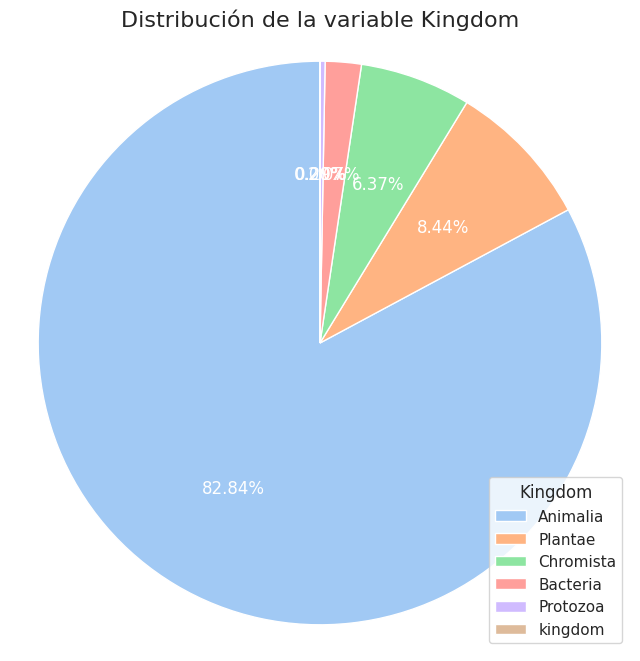

In [39]:
# Configuración de estilo de seaborn para mejorar la apariencia del gráfico
sns.set(style="whitegrid")

# Calcular las frecuencias
value_counts = data['kingdom'].value_counts()

# Etiquetas y datos
labels = value_counts.index
sizes = value_counts.values

# Gráfico de pie con seaborn
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.2f%%',
                                  textprops=dict(color="w"), startangle=90)

# Añadir una leyenda en la parte inferior derecha
plt.legend(wedges, labels, title='Kingdom', bbox_to_anchor=(1, 0), loc="lower right")

# Ajustes adicionales para mejorar la presentación
plt.title('Distribución de la variable Kingdom', fontsize=16)
plt.axis('equal')

plt.show()

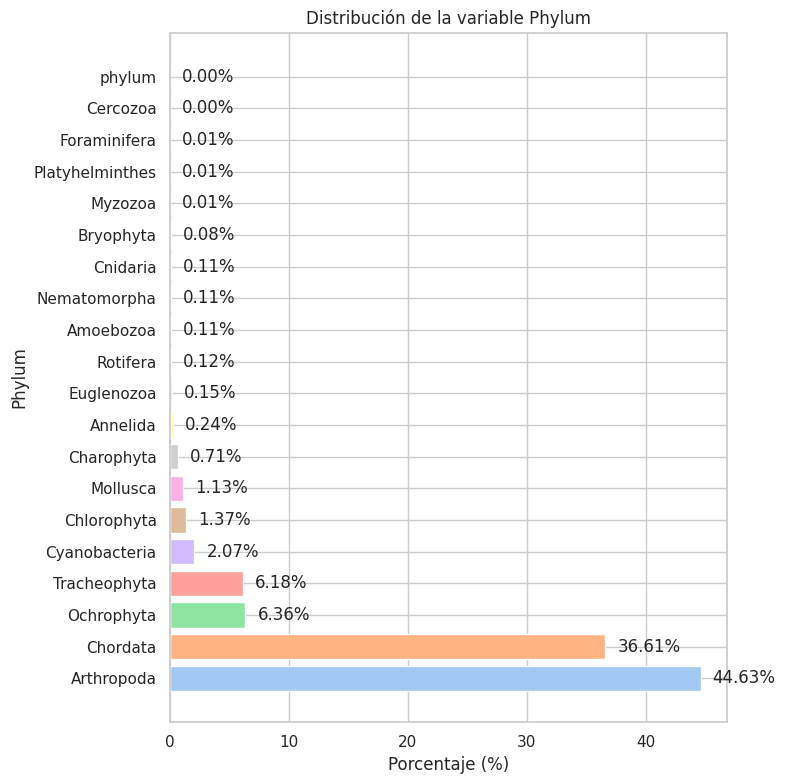

In [40]:
# Configuración de estilo de seaborn para mejorar la apariencia del gráfico
sns.set(style="whitegrid")

# Calcular las frecuencias
value_counts = data['phylum'].value_counts()

# Etiquetas y datos
labels = value_counts.index
sizes = value_counts.values

# Calcular porcentajes
percentages = sizes / sizes.sum() * 100

# Gráfico de barras apiladas con seaborn
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
plt.barh(labels, percentages, color=sns.color_palette("pastel"), edgecolor='w')

# Añadir etiquetas y título
plt.xlabel('Porcentaje (%)')
plt.ylabel('Phylum')
plt.title('Distribución de la variable Phylum')

# Mostrar porcentajes en las barras
for i, percentage in enumerate(percentages):
    plt.text(percentage + 1, i, f'{percentage:.2f}%', va='center')

# Ajustes adicionales
plt.tight_layout()
plt.show()

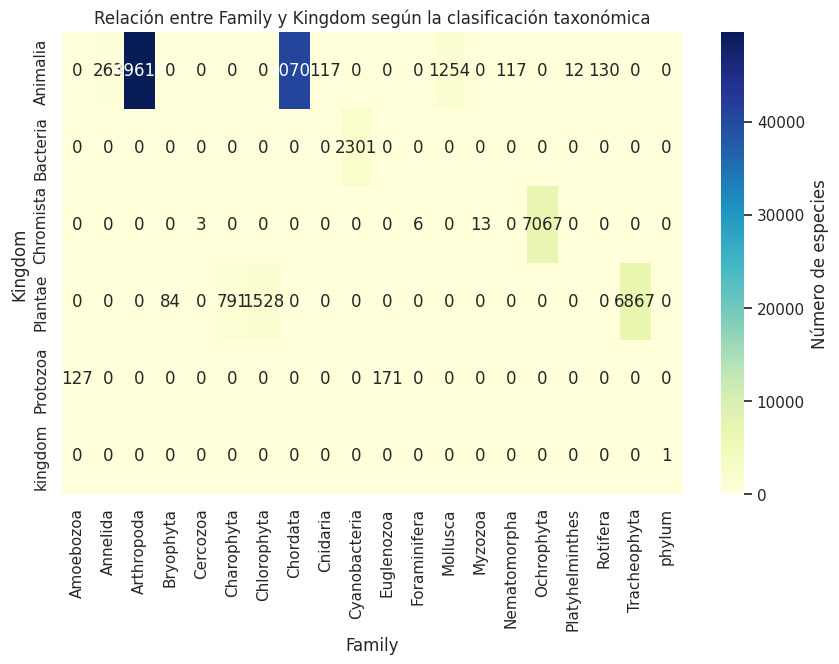

In [41]:
heatmap_data = pd.crosstab(data['kingdom'], data['phylum'])

# Configuración de estilo de seaborn para mejorar la apariencia del gráfico
sns.set(style="whitegrid")

# Crear un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d", cbar_kws={'label': 'Número de especies'})

# Añadir etiquetas y título
plt.xlabel('Family')
plt.ylabel('Kingdom')
plt.title('Relación entre Family y Kingdom según la clasificación taxonómica')

# Ajustes adicionales de diseño
plt.show()

# Calcular el índice de riqueza de especies y más número de especies

Para ello primero debo hallar el numero de especies que son difernetes dentro del dataset

In [42]:
import pandas as pd
import math

# Obtener especies únicas
especiesUnicas = data['species'].unique()
numeroUnicas = len(especiesUnicas)

# Información sobre especies únicas
print('Especies únicas:')
print(f'Total de especies únicas: {numeroUnicas}')
for especie in especiesUnicas:
    matching_rows = data[data['species'] == especie]
    if not matching_rows.empty:
        kingdom_correspondiente = matching_rows['kingdom'].iloc[0]
        print(f'{especie} - Kingdom: {kingdom_correspondiente}')
    else:
        print(f'{especie} - No se encontró una correspondencia en el DataFrame.')

Especies únicas:
Total de especies únicas: 1001
species - Kingdom: kingdom
Busarellus nigricollis - Kingdom: Animalia
Buteo albicaudatus - Kingdom: Animalia
Buteo albonotatus - Kingdom: Animalia
Pitangus sulphuratus - Kingdom: Animalia
Accipiter bicolor - Kingdom: Animalia
Buteo nitidus - Kingdom: Animalia
Pyrocephalus rubinus - Kingdom: Animalia
Rhynchocyclus olivaceus - Kingdom: Animalia
Todirostrum cinereum - Kingdom: Animalia
Tolmomyias sulphurescens - Kingdom: Animalia
Sublegatus arenarum - Kingdom: Animalia
Tyrannus dominicensis - Kingdom: Animalia
Dendrocygna autumnalis - Kingdom: Animalia
Inezia tenuirostris - Kingdom: Animalia
Machetornis rixosa - Kingdom: Animalia
Rostrhamus sociabilis - Kingdom: Animalia
Megarynchus pitangua - Kingdom: Animalia
Spizaetus ornatus - Kingdom: Animalia
Myiarchus crinitus - Kingdom: Animalia
Megaceryle alcyon - Kingdom: Animalia
Megaceryle torquata - Kingdom: Animalia
Myiarchus tyrannulus - Kingdom: Animalia
Chloroceryle amazona - Kingdom: Animal

In [43]:
import pandas as pd
import math

# Supongamos que ya tienes la lista de especies únicas en especiesUnicas
# Calcula la proporción de individuos por especie (pi)
total_individuos = len(data)  # Reemplaza con el tamaño total de tu DataFrame

# Reemplaza los valores nulos en la columna 'species' con 0
data['species'] = data['species'].fillna(0)

In [44]:
# Agrupa el DataFrame por la columna 'species' y cuenta las ocurrencias de cada especie
grupo_especies = data.groupby('species').size().reset_index(name='conteo')

# Calcula las proporciones
grupo_especies['proporcion'] = grupo_especies['conteo'] / total_individuos

# Calcula el índice de Shannon-Wiener
indice_shannon = -sum(pi * math.log(pi) for pi in grupo_especies['proporcion'] if pi > 0)

print(f'Índice de Biodiversidad de Shannon (H\'): {indice_shannon}')

Índice de Biodiversidad de Shannon (H'): 3.7899341003257043


## Especies con mayor ocurrencia

#### Top 5 mayores especies en general

In [45]:
import numpy as np

# Excluir la especie '0' al contar las especies
filtered_data = data[data['species'] != '0']
top_species = filtered_data['species'].value_counts().head(6)

print("Top 5 de especies que más aparecen:")
print(top_species)

Top 5 de especies que más aparecen:
0                         52154
Canthidium euchalceum      3028
Canthon acutus             2134
Gonatodes vittatus         1302
Engystomops pustulosus     1114
Alouatta seniculus         1077
Name: species, dtype: int64


Top 3 especies por 'kingdom'

In [46]:
filtered_data = data[data['species'] != '0']

# Obtener el top 3 de cada especie por la variable 'kingdom'
filtered_data = data[data['species'] != '0']

# Obtener el top 3 de las especies más repetidas para cada categoría de 'kingdom'
top_3_by_kingdom = (
    filtered_data.groupby('kingdom')['species']
    .value_counts()
    .groupby(level=0, group_keys=False)
    .nlargest(3)
    .reset_index(name='count')
)

print("Top 3 de las especies más repetidas para cada categoría de 'kingdom':")
print(top_3_by_kingdom)

Top 3 de las especies más repetidas para cada categoría de 'kingdom':
      kingdom                 species  count
0    Animalia                       0  39138
1    Animalia   Canthidium euchalceum   3028
2    Animalia          Canthon acutus   2134
3    Bacteria                       0   2197
4    Bacteria    Chroococcus turgidus    104
5   Chromista                       0   6860
6   Chromista            Synedra ulna    130
7   Chromista     Nitzschia sigmoidea     31
8     Plantae                       0   3748
9     Plantae  Achatocarpus nigricans    327
10    Plantae    Senegalia polyphylla    296
11   Protozoa                       0    211
12   Protozoa     Galeripora artocrea     20
13   Protozoa       Arcella discoides     13
14    kingdom                 species      1


## Especies de plantas coincidentes y su escala de riesgo
Se cmpara con una base de datos de la universidad nacional - observaciones botánicas. Los registros de plantas de la región si coinciden o no con los observados en los datos de cerrejon, para generar algun modelo de composicion ecosistemico y tomarlo como nueva variable para el modleo de regresión logístico.

Al haber únicamente 5 coincidencias de plantas, se concluye que no es viable la construccion del perfil ecosistemico a falta de información

In [47]:
import pandas as pd
redlist = pd.read_csv("points_data.csv")

FileNotFoundError: ignored

In [ ]:
redlist.head(100)

In [ ]:
import pandas as pd
headers = ["gbifID", "datasetKey", "occurrenceID", "kingdom", "phylum", "class", "order", "family", "genus", "species", "infraspecificEpithet", "taxonRank", "scientificName", "verbatimScientificName", "verbatimScientificNameAuthorship", "countryCode", "locality", "stateProvince", "occurrenceStatus", "individualCount", "publishingOrgKey", "decimalLatitude", "decimalLongitude", "coordinateUncertaintyInMeters", "coordinatePrecision", "elevation", "elevationAccuracy", "depth", "depthAccuracy", "eventDate", "day", "month", "year", "taxonKey", "speciesKey", "basisOfRecord", "institutionCode", "collectionCode", "catalogNumber", "recordNumber", "identifiedBy", "dateIdentified", "license", "rightsHolder", "recordedBy", "typeStatus", "establishmentMeans", "lastInterpreted", "mediaType", "issue"]
mff1 = pd.read_csv('mff1.csv', names = headers,  sep='\t')
plantas = pd.read_excel("todasplantas.xlsx")

In [ ]:
mff1.head(5)

In [ ]:
plantas.head(5)

In [ ]:
especies_coincidentes_mff1 = mff1[mff1['species'].isin(plantas['Nombre'])]
especies_coincidentes_plantas = plantas[plantas['Nombre'].isin(mff1['species'])]

In [ ]:
especies_coincidentes_mff1.head()

In [ ]:
especies_coincidentes_plantas.head()

Filtrar el nuevo dataset con las especies coincidentes

In [ ]:
mff1_filtrado = mff1[mff1['species'].isin(especies_coincidentes_mff1['species'])]
mff1_filtrado.head()

In [ ]:
plantas_filtrado = plantas[plantas['Nombre'].isin(especies_coincidentes_plantas['Nombre'])]
plantas_filtrado.head()

# Modelo de regresión logística
Se realizará el testeo de un modelo de regresión logística en el que se probará la presencia o ausencia de las especies en un territorio de acuerdo a ciertas condiciones ambnientales.

In [49]:
pip install pandas scikit-learn matplotlib

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Rellenar los datos faltantes de las variables *depth* y *elevation* con la media.

In [51]:
imputador = SimpleImputer(strategy='mean')
data['depth'] = imputador.fit_transform(data[['depth']])
data['elevation'] = imputador.fit_transform(data[['elevation']])
# data = data.drop('verbatimScientificNameAuthorship', axis =1)

data.head()

,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,countryCode,locality,stateProvince,occurrenceStatus,individualCount,decimalLatitude,decimalLongitude,elevation,depth,eventDate,day,month,year,taxonKey,speciesKey,preasure,temperature at 2 meters,Specific humidity,Wind speed at 50 meters,YEAR,MONTH,Precipitation corrected
0,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,countryCode,locality,stateProvince,occurrenceStatus,individualCount,decimalLatitude,decimalLongitude,122.054035,0.002888,NaT,day,<NA>,<NA>,taxonKey,speciesKey,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN
1,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Busarellus,Busarellus nigricollis,NaN,SPECIES,"Busarellus nigricollis (Latham, 1790)",Busarellus nigricollis,CO,Arroyo Palomino,La Guajira,ABSENT,0,10.972583,-72.754556,138.000000,0.000000,2006-01-01,NaN,1,2006,2480692,2480692,96.82,24.47,14.77,3.26,2006,1,0.0
2,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Buteo,Buteo albicaudatus,NaN,SPECIES,"Buteo albicaudatus Vieillot, 1816",Buteo albicaudatus,CO,Arroyo Palomino,La Guajira,ABSENT,0,10.972583,-72.754556,138.000000,0.000000,2006-01-01,NaN,1,2006,2480519,2480519,96.82,24.47,14.77,3.26,2006,1,0.0
3,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Buteo,Buteo albonotatus,NaN,SPECIES,"Buteo albonotatus Kaup, 1847",Buteo albonotatus,CO,Arroyo Palomino,La Guajira,ABSENT,0,10.972583,-72.754556,138.000000,0.000000,2006-01-01,NaN,1,2006,2480541,2480541,96.82,24.47,14.77,3.26,2006,1,0.0
4,Animalia,Chordata,Aves,Passeriformes,Tyrannidae,Pitangus,Pitangus sulphuratus,NaN,SPECIES,"Pitangus sulphuratus (Linnaeus, 1766)",Pitangus sulphuratus,CO,"Río Ranchería, Sector La Calaguala",La Guajira,PRESENT,1,11.112,-72.634778,0.000000,0.000000,2009-01-01,NaN,1,2009,2482755,2482755,96.89,24.73,14.4,3.18,2009,1,0.0


### Conectar API de condiciones climaticas
Conectar a la API de worldclim para obtener un dataframe con las condiciones ambientales

In [52]:
import pandas as pd
import requests
import time

def obtener_datos_bioclimaticos(latitud, longitud):
    url = f'https://worldclim.org/api/bioclim?lat={latitud}&lon={longitud}&decimal=3&format=json'
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

    try:
        respuesta = requests.get(url, headers=headers)
        respuesta.raise_for_status()
        datos_bioclimaticos = respuesta.json()
        df_bioclimatico = pd.DataFrame(datos_bioclimaticos.items(), columns=['Variable', 'Valor'])
        return df_bioclimatico

    except requests.exceptions.RequestException as e:
        print(f"Error de solicitud: {e}")
        return None
    except Exception as e:
        print(f"Error al obtener datos bioclimáticos: {e}")
        return None

# Crear un DataFrame para almacenar los resultados
df_resultados_totales = pd.DataFrame(columns=['latitud', 'longitud', 'Variable', 'Valor'])

# Iterar sobre los registros y obtener datos bioclimáticos
for index, fila in mff1.iterrows():
    latitud = fila['decimalLatitude']
    longitud = fila['decimalLongitude']

    # Obtener datos bioclimáticos para la latitud y longitud actual
    df_resultado = obtener_datos_bioclimaticos(latitud, longitud)

    # Agregar la información de latitud y longitud al DataFrame de resultados totales
    if df_resultado is not None:
        df_resultado['latitud'] = latitud
        df_resultado['longitud'] = longitud
        df_resultados_totales = pd.concat([df_resultados_totales, df_resultado], ignore_index=True)

    # Agregar una pausa de 1 segundo entre solicitudes para evitar límites
    time.sleep(1)

# Mostrar el DataFrame con los resultados totales
print(df_resultados_totales)



Error de solicitud: 403 Client Error: Forbidden for url: https://worldclim.org/api/bioclim?lat=decimalLatitude&lon=decimalLongitude&decimal=3&format=json
Error de solicitud: 403 Client Error: Forbidden for url: https://worldclim.org/api/bioclim?lat=10.972583&lon=-72.754556&decimal=3&format=json
Error de solicitud: 403 Client Error: Forbidden for url: https://worldclim.org/api/bioclim?lat=10.972583&lon=-72.754556&decimal=3&format=json
Error de solicitud: 403 Client Error: Forbidden for url: https://worldclim.org/api/bioclim?lat=10.972583&lon=-72.754556&decimal=3&format=json
Error de solicitud: 403 Client Error: Forbidden for url: https://worldclim.org/api/bioclim?lat=11.112&lon=-72.634778&decimal=3&format=json


KeyboardInterrupt: ignored

In [ ]:
variables_climaticas = df_resultados_totales[['temp', 'prec', 'hum']]
variables_geoespaciales = mff1[['latitud', 'longitud', 'elevacion', 'depth']]


## Lanzamiento del modelo de regresión logistica binaria

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Dicotomizar la variable objetivo
- 0: ABSENT
- 1: PRESENT

In [54]:
# Dicotomización de la variable objetivo
le = LabelEncoder()
data['occurrenceStatus'] = le.fit_transform(data['occurrenceStatus'])
print(data['occurrenceStatus'])

0         2
1         0
2         0
3         0
4         1
         ..
111349    1
111350    1
111351    1
111352    1
111353    1
Name: occurrenceStatus, Length: 111354, dtype: int64


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Copia del DataFrame para no modificar el original
data_encoded = data.copy()

# Codificar 'occurrenceStatus' en 0 y 1
label_encoder = LabelEncoder()
data_encoded['occurrenceStatus'] = label_encoder.fit_transform(data_encoded['occurrenceStatus'])

# Eliminar filas donde 'occurrenceStatus' no es 0 o 1
data_encoded = data_encoded[data_encoded['occurrenceStatus'].isin([0, 1])]

# Selecciona las variables predictoras
predictors = data_encoded[['depth', 'elevation', 'preasure', 'temperature at 2 meters', 'Specific humidity', 'Wind speed at 50 meters', 'Precipitation corrected', 'kingdom', 'phylum']]

# Realiza one-hot encoding en las variables cualitativas
predictors = pd.get_dummies(predictors, columns=['kingdom', 'phylum'])

# Selecciona la variable objetivo
target = data_encoded['occurrenceStatus']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# Crea el imputador
imputer = SimpleImputer(strategy='mean')

# Aplica la imputación a tus conjuntos de entrenamiento y prueba
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Inicializa el modelo de regresión logística
model = LogisticRegression()

# Ajusta el modelo al conjunto de entrenamiento
model.fit(X_train_imputed, y_train)

# Predice en el conjunto de prueba
y_pred = model.predict(X_test_imputed)

# Calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

# Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Informe de clasificación
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))

# Coeficientes del modelo
coeficientes = model.coef_[0]
nombres_variables = list(X_train.columns)
coeficientes_df = pd.DataFrame({'Variable': nombres_variables, 'Coeficiente': coeficientes})
coeficientes_df = coeficientes_df.sort_values(by='Coeficiente', ascending=False)
print("\nCoeficientes del modelo:")
print(coeficientes_df)



Precisión del modelo: 85.12%

Matriz de Confusión:
[[ 4199  2299]
 [ 1015 14758]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.65      0.72      6498
           1       0.87      0.94      0.90     15773

    accuracy                           0.85     22271
   macro avg       0.84      0.79      0.81     22271
weighted avg       0.85      0.85      0.85     22271


Coeficientes del modelo:
                   Variable  Coeficiente
3   temperature at 2 meters     2.645838
5   Wind speed at 50 meters     1.045489
4         Specific humidity     1.009484
14        phylum_Arthropoda     0.662949
7          kingdom_Animalia     0.296581
27        phylum_Ochrophyta     0.198701
19          phylum_Chordata     0.193395
9         kingdom_Chromista     0.180006
30      phylum_Tracheophyta     0.035891
11         kingdom_Protozoa     0.018864
0                     depth     0.016464
12         phylum_Amoebozoa     0.013627
29   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Grafica de correlación entre variables predictoras y la variable onjetivo

<ipython-input-58-c0b90483e28c>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_for_correlation.corr()


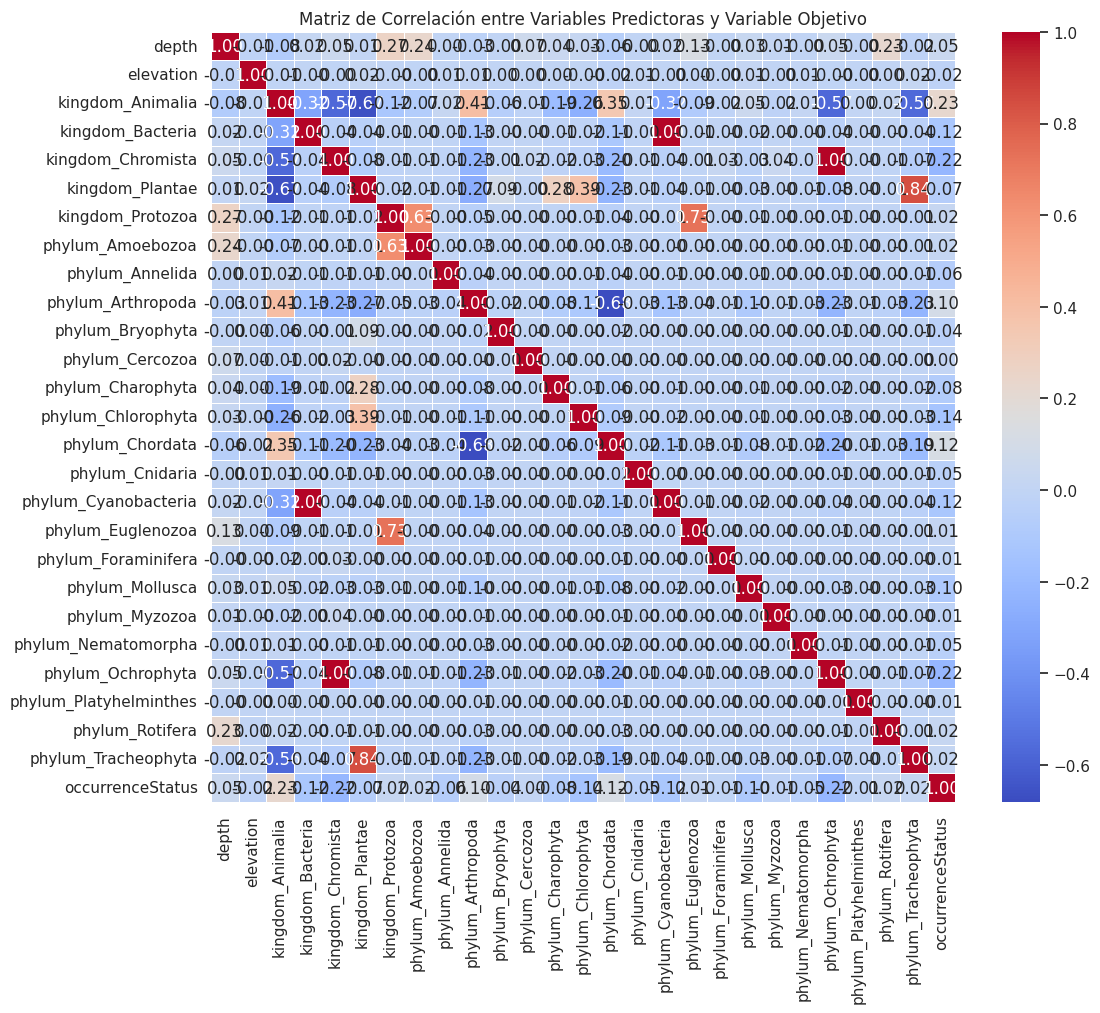

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenar las variables predictoras y la variable objetivo en un solo DataFrame
data_for_correlation = pd.concat([predictors, target], axis=1)

# Calcular la matriz de correlación
correlation_matrix = data_for_correlation.corr()

# Crear un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Predictoras y Variable Objetivo')
plt.show()

##### Modelo logístico con statsmodels y P-valores

**MODELO LOGÍSTICO PARA OBTENER VARIABLES SIGNIFICATIVAS Y P-VALOR**

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# from sklearn.impute import SimpleImputer
# import pandas as pd
# import statsmodels.api as sm

# # Copia del DataFrame para no modificar el original
# data_encoded = data.copy()

# # Codificar 'occurrenceStatus' en 0 y 1
# label_encoder = LabelEncoder()
# data_encoded['occurrenceStatus'] = label_encoder.fit_transform(data_encoded['occurrenceStatus'])

# # Eliminar filas donde 'occurrenceStatus' no es 0 o 1
# data_encoded = data_encoded[data_encoded['occurrenceStatus'].isin([0, 1])]

# # Selecciona las variables predictoras
# predictors = data_encoded[['depth', 'elevation', 'preasure', 'temperature at 2 meters', 'Specific humidity', 'Wind speed at 50 meters', 'Precipitation corrected', 'kingdom', 'genus']]

# # Realiza one-hot encoding en las variables cualitativas
# predictors = pd.get_dummies(predictors, columns=['kingdom', 'genus'])

# # Selecciona la variable objetivo
# target = data_encoded['occurrenceStatus']

# # Divide los datos en conjuntos de entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# # Crea el imputador
# imputer = SimpleImputer(strategy='mean')

# # Aplica la imputación a tus conjuntos de entrenamiento y prueba
# X_train_imputed = imputer.fit_transform(X_train)
# X_test_imputed = imputer.transform(X_test)

# # Inicializa el modelo de regresión logística con statsmodels
# X_train_imputed = sm.add_constant(X_train_imputed)  # Agrega una columna de intercepto
# model = sm.Logit(y_train, X_train_imputed)
# result = model.fit()

# # Predice en el conjunto de prueba
# y_pred = result.predict(sm.add_constant(X_test_imputed)).round()

# # Calcula la precisión del modelo
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Precisión del modelo: {accuracy * 100:.2f}%')

# # Matriz de confusión
# print("\nMatriz de Confusión:")
# print(confusion_matrix(y_test, y_pred))

# # Informe de clasificación
# print("\nInforme de Clasificación:")
# print(classification_report(y_test, y_pred))

# # Coeficientes y p-values del modelo
# coeficientes_df = pd.DataFrame({'Variable': X_train.columns, 'Coeficiente': result.params, 'P-valor': result.pvalues})
# coeficientes_df = coeficientes_df.sort_values(by='Coeficiente', ascending=False)
# print("\nCoeficientes del modelo:")
# print(coeficientes_df)


#### Significancia de variables

In [62]:
from sklearn.decomposition import PCA

# Calcula la matriz de correlación
correlation_matrix = np.corrcoef(X_train_imputed, rowvar=False)

# Elimina variables altamente correlacionadas
threshold = 0.80  # Ajusta según sea necesario
corr_var_pairs = np.where(np.abs(correlation_matrix) > threshold)
corr_vars = set()
for i, j in zip(*corr_var_pairs):
    if i != j and i not in corr_vars and j not in corr_vars:
        print(f'Variables {X_train.columns[i]} y {X_train.columns[j]} tienen una correlación alta: {correlation_matrix[i, j]:.2f}')
        corr_vars.add(j)

# Elimina las variables correlacionadas
X_train_imputed_filtered = X_train_imputed[:, list(set(range(X_train_imputed.shape[1])) - corr_vars)]


Variables preasure y Specific humidity tienen una correlación alta: -0.98
Variables preasure y Wind speed at 50 meters tienen una correlación alta: 0.96
Variables preasure y Precipitation corrected tienen una correlación alta: -0.91
Variables kingdom_Bacteria y phylum_Cyanobacteria tienen una correlación alta: 1.00
Variables kingdom_Chromista y phylum_Ochrophyta tienen una correlación alta: 1.00
Variables kingdom_Plantae y phylum_Tracheophyta tienen una correlación alta: 0.85


**Matriz de confusión**

1. Verdaderos positivos (True Positives, TP): La cantidad de observaciones que el modelo clasifica correctamente como positivas (presencia).

2. Verdaderos negativos (True Negatives, TN): La cantidad de observaciones que el modelo clasifica correctamente como negativas (ausencia).

3. Falsos positivos (False Positives, FP): La cantidad de observaciones que el modelo clasifica incorrectamente como positivas cuando en realidad son negativas (falsas alarmas).

4. Falsos negativos (False Negatives, FN): La cantidad de observaciones que el modelo clasifica incorrectamente como negativas cuando en realidad son positivas (omisiones).


- Precisión (Accuracy): Mide la proporción de predicciones correctas en relación con el total de observaciones. Se calcula como (TP + TN) / (TP + TN + FP + FN).

- Sensibilidad (Recall o True Positive Rate): Mide la proporción de observaciones positivas que fueron correctamente clasificadas. Se calcula como TP / (TP + FN).

- Especificidad (Specificity o True Negative Rate): Mide la proporción de observaciones negativas que fueron correctamente clasificadas. Se calcula como TN / (TN + FP).

- Precisión (Precision o Positive Predictive Value): Mide la proporción de predicciones positivas que fueron correctas. Se calcula como TP / (TP + FP).

- F1-score: Es una medida del equilibrio entre precisión y sensibilidad. Se calcula como 2 * (Precision * Sensitivity) / (Precision + Sensitivity).


In [ ]:
"""
                 |   Predicción Positiva    |   Predicción Negativa
---------------------------------------------------------------------
Real Positivo    |   Verdadero Positivo (TP)|   Falso Negativo (FN)
---------------------------------------------------------------------
Real Negativo    |   Falso Positivo (FP)    |   Verdadero Negativo (TN)

"""

In [63]:
# Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Informe de clasificación
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))



Matriz de Confusión:
[[ 4199  2299]
 [ 1015 14758]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.65      0.72      6498
           1       0.87      0.94      0.90     15773

    accuracy                           0.85     22271
   macro avg       0.84      0.79      0.81     22271
weighted avg       0.85      0.85      0.85     22271



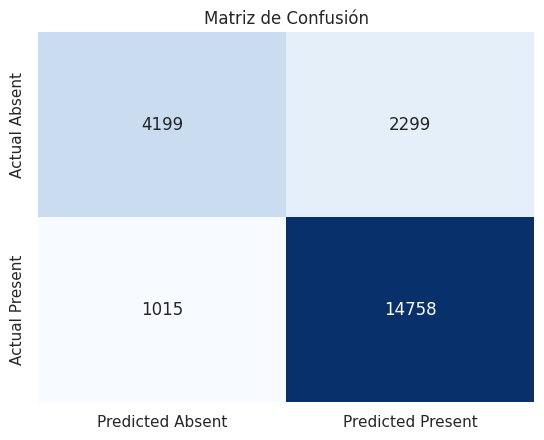

Sensibilidad (Recall): 0.94
Especificidad: 0.65
Precisión (Precision): 0.87
F1-score: 0.90


In [65]:
# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Absent', 'Predicted Present'],
            yticklabels=['Actual Absent', 'Actual Present'])
plt.title('Matriz de Confusión')
plt.show()

# Obtener valores de la matriz de confusión
TP = cm[1, 1]  # True Positive
TN = cm[0, 0]  # True Negative
FP = cm[0, 1]  # False Positive
FN = cm[1, 0]  # False Negative

# Calcular Sensibilidad, Especificidad, Precisión y F1-score
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

# Imprimir los resultados
print(f'Sensibilidad (Recall): {sensitivity:.2f}')
print(f'Especificidad: {specificity:.2f}')
print(f'Precisión (Precision): {precision:.2f}')
print(f'F1-score: {f1_score:.2f}')

### Comprobación de supuestos

1. Independencia de errores
**Interpretación**: Este gráfico muestra la dispersión de los residuos en función de las predicciones. Los residuos deberían distribuirse aleatoriamente alrededor de cero para garantizar la independencia de los errores.

/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


<Axes: ylabel='occurrenceStatus'>

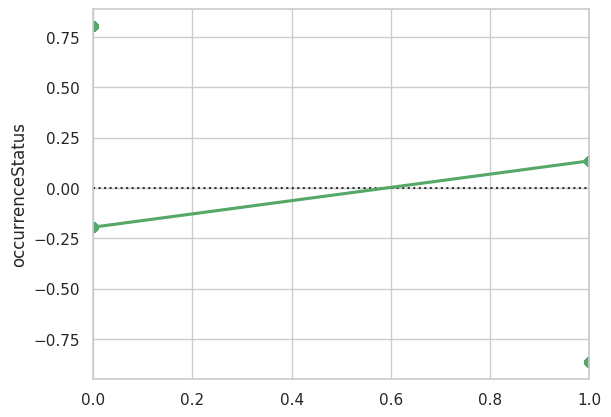

In [66]:
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True, color="g")

2. Normalidad de los residuos

Este gráfico de probabilidad normal (Q-Q plot) compara la distribución de los residuos con una distribución normal teórica. Si los puntos se ajustan aproximadamente a la línea, se asume normalidad

((array([-4.00413184, -3.78926959, -3.67175317, ...,  3.67175317,
          3.78926959,  4.00413184]),
  array([-1, -1, -1, ...,  1,  1,  1])),
 (0.27540945267881284, -0.057653450675766583, 0.72194277450109))

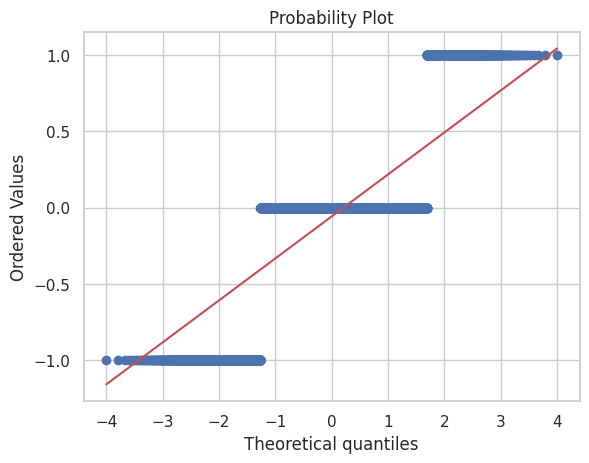

In [67]:
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)

3. Homocedasticidad de la varianza



<Axes: ylabel='occurrenceStatus'>

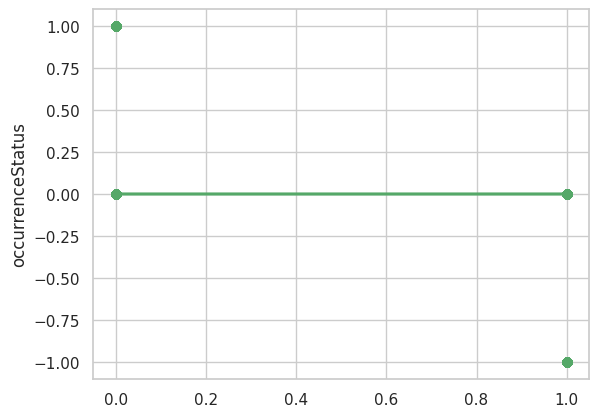

In [68]:
sns.regplot(x=y_pred, y=residuals, lowess=True, color="g")

**4. Curva de probabilidad**

Interpretación: Este gráfico verifica si la relación entre el logaritmo de las probabilidades y la variable predictora es lineal. Se espera que el gráfico sea aproximadamente lineal.

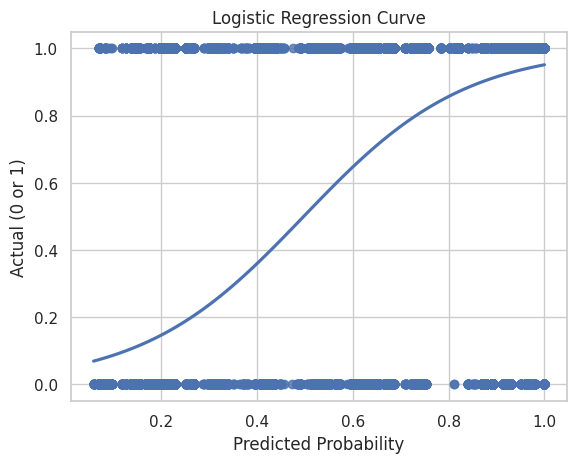

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Predicted probabilities on the training set
y_pred_prob = model.predict_proba(X_train_imputed)[:, 1]

# Create a DataFrame with predicted probabilities and the actual target values
logistic_data = pd.DataFrame({'Predicted Probability': y_pred_prob, 'Actual': y_train})

# Plot the logistic regression curve
sns.regplot(x='Predicted Probability', y='Actual', data=logistic_data, logistic=True)
plt.title('Logistic Regression Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('Actual (0 or 1)')
plt.show()

5. verificar multicolinealidad

In [72]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert X_train_imputed to a DataFrame
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)

# Calculate the VIF
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_df = calculate_vif(X_train_imputed_df)
print(vif_df)


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                   Variable           VIF
0                     depth  1.237423e+00
1                 elevation  1.014868e+00
2                  preasure  3.934689e+01
3   temperature at 2 meters  2.428988e+00
4         Specific humidity  5.031943e+01
5   Wind speed at 50 meters  4.141871e+01
6   Precipitation corrected  1.053969e+01
7          kingdom_Animalia  1.900675e+07
8          kingdom_Bacteria           inf
9         kingdom_Chromista           inf
10          kingdom_Plantae  1.928600e+06
11         kingdom_Protozoa  6.341006e+04
12         phylum_Amoebozoa  5.744304e+00
13          phylum_Annelida  9.104636e+00
14        phylum_Arthropoda  8.156053e+02
15         phylum_Bryophyta  1.790986e+00
16          phylum_Cercozoa           inf
17        phylum_Charophyta  7.564184e+00
18       phylum_Chlorophyta  1.384707e+01
19          phylum_Chordata  7.667482e+02
20          phylum_Cnidaria  4.188128e+00
21     phylum_Cyanobacteria           inf
22        phylum_Euglenozoa  7.556

Curva *ROC* del modelo

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


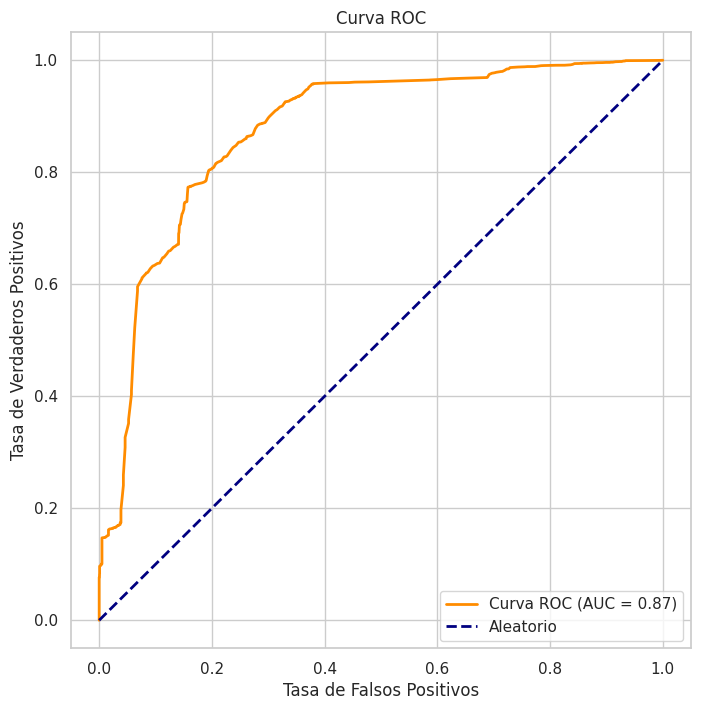

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Obtén las probabilidades predichas en lugar de las etiquetas predichas
y_prob = model.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Trazar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Curva de *Precision recall*

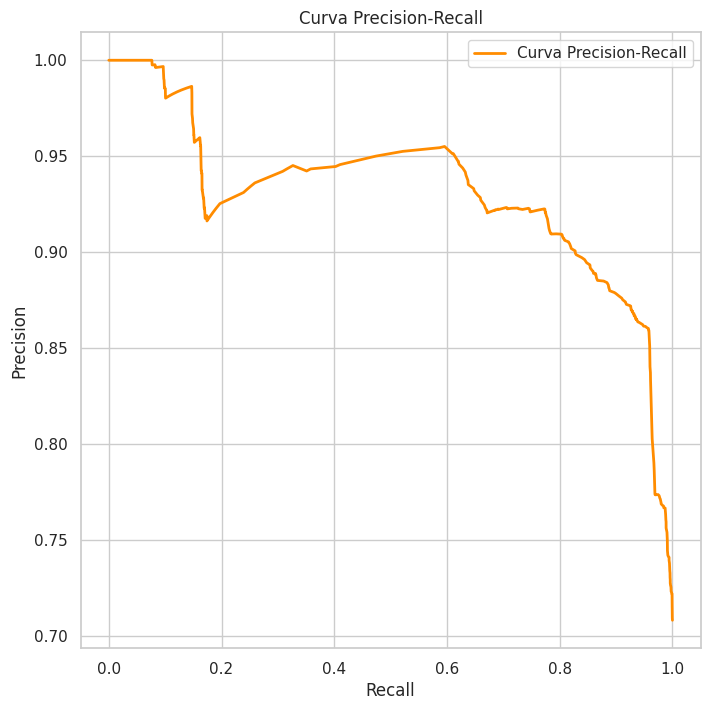

In [71]:
from sklearn.metrics import precision_recall_curve

# Calcula la curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Trazar la curva Precision-Recall
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label='Curva Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend(loc='upper right')
plt.show()

### Conclusión del modelo de regresión logística binaria

Con un accuracy de 85.12 % las predicciones que realiza el modelo para determinar la presencia u ausencia de una especie en el territorio circundante a las coordenadas longitude: -72.6500 y Latitude: 11.1173, bajo los predictores bioclimaticos elevation,depth, temperature at 2 meters, preasure, wind speed at 50 meters, specific humidity, kingdom y phylum son correctas.